In [93]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import calendar

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [94]:
# https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

user_netflix=pd.read_csv("Netflix Userbase.csv")
user_netflix

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
65,66,Premium,15,2022-01-30,2023-06-27,France,29,Male,Smartphone,1 Month
66,67,Basic,10,2022-09-18,2023-06-25,Brazil,47,Female,Smart TV,1 Month
67,68,Standard,12,2021-11-09,2023-06-24,Mexico,33,Male,Tablet,1 Month
68,69,Premium,15,2022-12-23,2023-06-23,Spain,36,Female,Laptop,1 Month


In [95]:
user_netflix.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [96]:
duplicated = user_netflix.duplicated()
num_duplicated = duplicated.sum()
print(f'There are {num_duplicated} duplicate rows')

There are 0 duplicate rows


In [97]:
user_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            70 non-null     int64 
 1   Subscription Type  70 non-null     object
 2   Monthly Revenue    70 non-null     int64 
 3   Join Date          70 non-null     object
 4   Last Payment Date  70 non-null     object
 5   Country            70 non-null     object
 6   Age                70 non-null     int64 
 7   Gender             70 non-null     object
 8   Device             70 non-null     object
 9   Plan Duration      70 non-null     object
dtypes: int64(3), object(7)
memory usage: 5.6+ KB


In [98]:
# convert object dtype into datetime dtype

user_netflix['Join Date'] = pd.to_datetime(user_netflix['Join Date'])  
user_netflix['Last Payment Date'] = pd.to_datetime(user_netflix['Last Payment Date']) 

In [99]:
user_netflix.nunique()

User ID              70
Subscription Type     3
Monthly Revenue       3
Join Date            68
Last Payment Date     8
Country              10
Age                  25
Gender                2
Device                4
Plan Duration         1
dtype: int64

In [100]:
# For exploring data we don't need User ID feature
user_netflix.drop(['User ID'],axis=1, inplace=True)

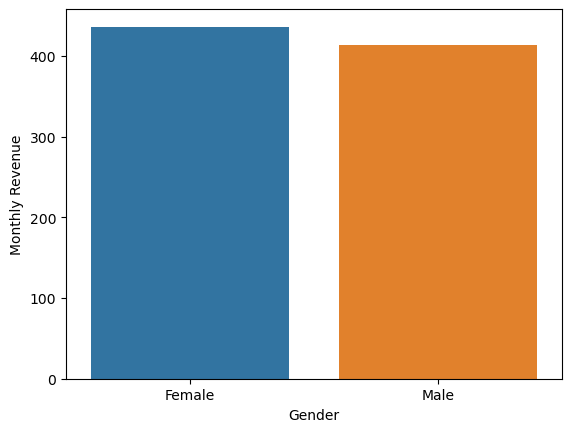

In [116]:
# 

sm = user_netflix.groupby('Gender').sum().reset_index()
sns.barplot(data=sm,x='Gender', y='Monthly Revenue')
plt.show()

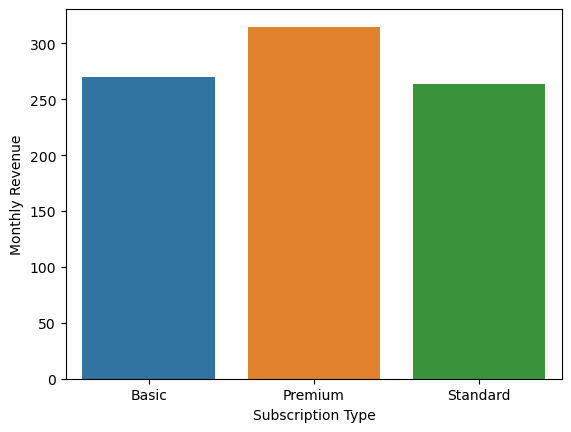

In [117]:
sm = user_netflix.groupby('Subscription Type').sum().reset_index()
sns.barplot(data=sm,x='Subscription Type', y='Monthly Revenue')
plt.show()

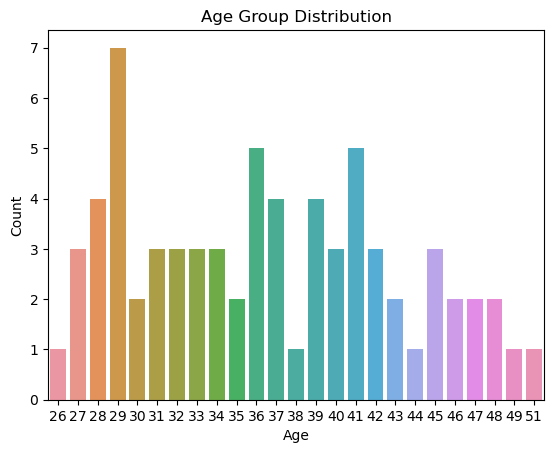

In [102]:
sns.countplot(x='Age', data=user_netflix)
plt.title('Age Group Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

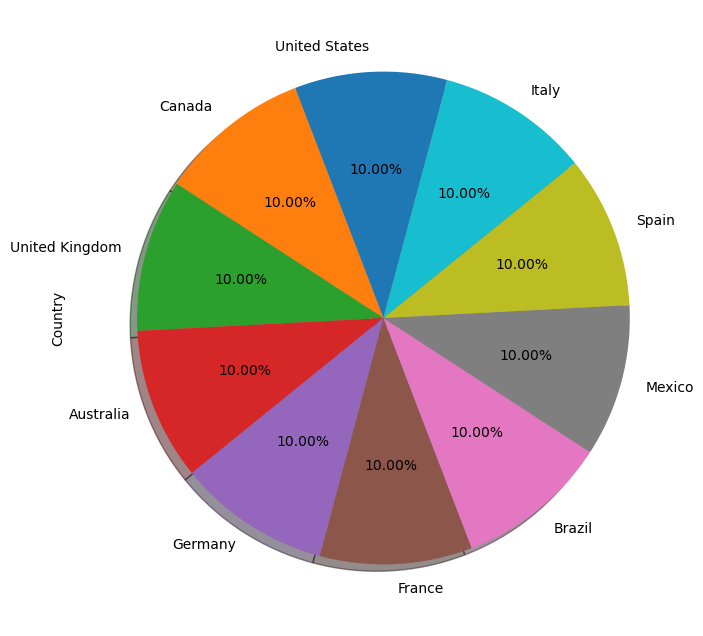

In [103]:
user_netflix.Country.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

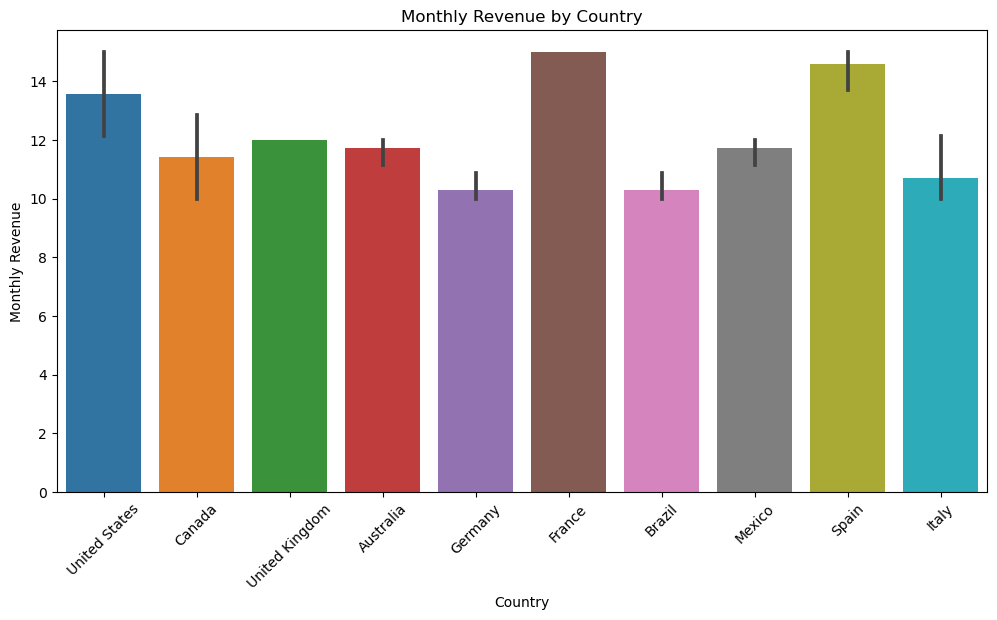

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(data=user_netflix, x='Country', y='Monthly Revenue')
plt.title('Monthly Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=45)
plt.show()

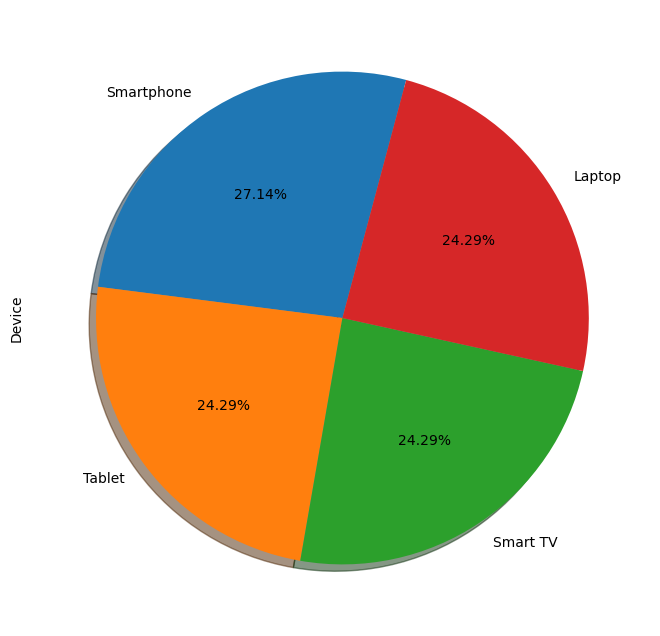

In [104]:
user_netflix.Device.value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

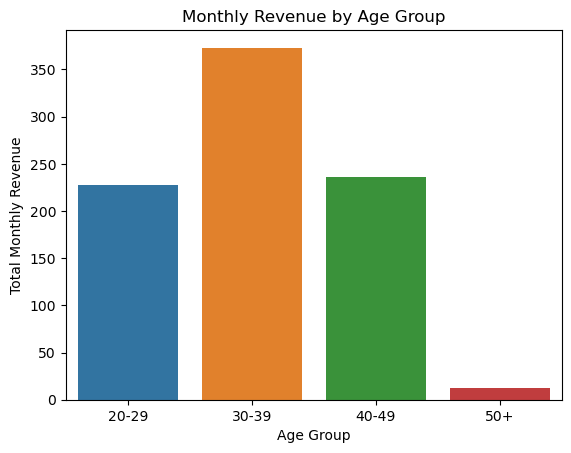

In [105]:
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50+']

user_netflix['age group'] = pd.cut(user_netflix['Age'], bins=age_bins, labels=age_labels)
revenue_by_age = user_netflix.groupby('age group')['Monthly Revenue'].sum().reset_index()
sns.barplot(data=revenue_by_age, x='age group',y='Monthly Revenue')
plt.xlabel('Age Group')
plt.ylabel('Total Monthly Revenue')
plt.title('Monthly Revenue by Age Group')
plt.show()

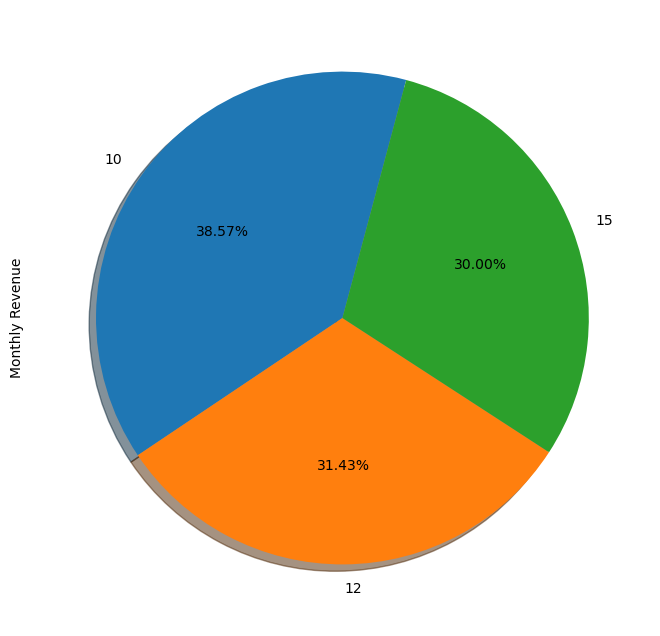

In [106]:
user_netflix['Monthly Revenue'].value_counts().plot(kind='pie',shadow='True' ,autopct='%1.2f%%', startangle = 75,figsize=(8,8))
plt.show()

In [107]:
user_netflix['Month'] = user_netflix['Join Date'].dt.month
monthly_subscriptions = user_netflix['Month'].value_counts().sort_index()
max_month = monthly_subscriptions.idxmax()

print("The month with the most subscriptions is: ",max_month)

The month with the most subscriptions is:  1


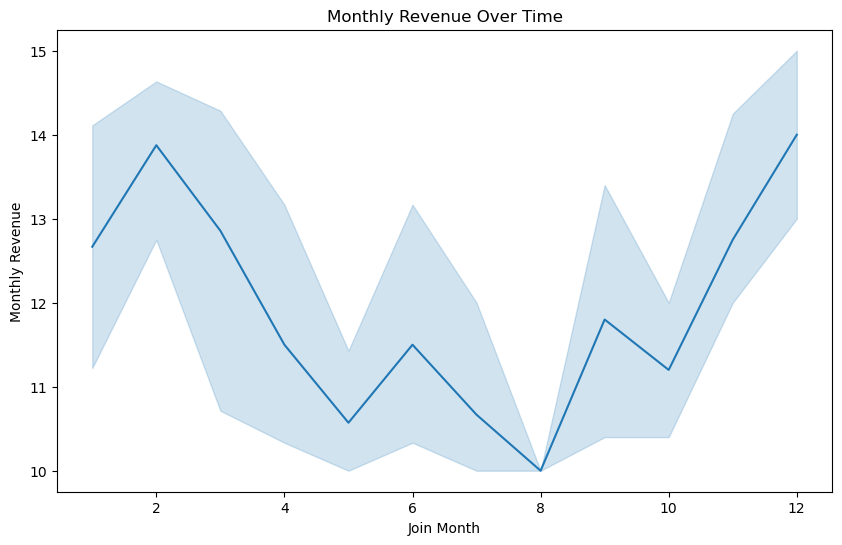

In [108]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=user_netflix, x='Month', y='Monthly Revenue', estimator='mean')
plt.title('Monthly Revenue Over Time')
plt.xlabel('Join Month')
plt.ylabel('Monthly Revenue')
plt.show()

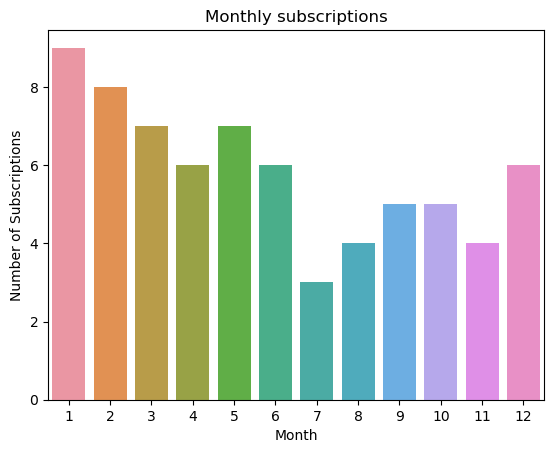

In [109]:
sns.countplot(x='Month', data=user_netflix)
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.title('Monthly subscriptions')
plt.show()

In [110]:
user_netflix['Month'] = user_netflix['Month'].map(lambda x: calendar.month_name[x])

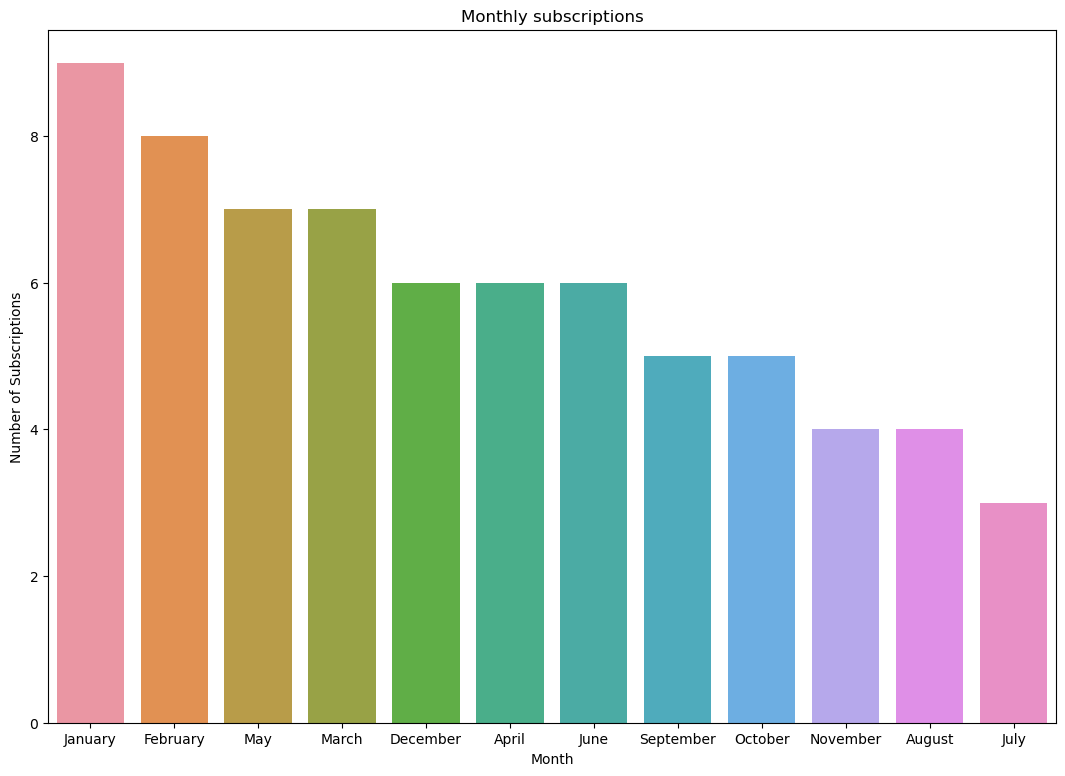

In [111]:
plt.figure(figsize=(13, 9))
sns.countplot(x='Month', data=user_netflix, order=user_netflix['Month'].value_counts().index)
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.title('Monthly subscriptions')
plt.show()

<AxesSubplot:>

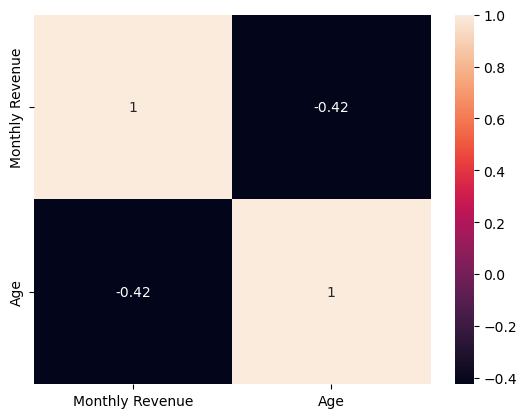

In [112]:
corr_matrix=user_netflix.corr()
sns.heatmap(corr_matrix,annot=True)

## Final Insights
Based on the provided dataset, we have performed several data visualizations to gain insights into user subscriptions and monthly revenue. Here are the key findings from the visualizations:

- There are more women leaving income
- Subscriptions are more premium
- The highest peak is in people with 29 years and from there people with 36 and 41 years would follow
- The most profitable country is France so far
- There are a little more people with smartphones who use netflix
- As of October subscriptions are increasing
- January is the month with the highest increase in subscriptions

These visualizations have helped identify key trends, patterns, and variations in user subscriptions and revenue generation within the dataset. They provide valuable insights for understanding user behavior, preferences, and revenue dynamics. The conclusions drawn from these visualizations can guide strategic decisions and actions to optimize user retention and revenue generation for the Netflix platform.